In [50]:
from __future__ import print_function
import keras
from keras.datasets import fashion_mnist # new with Keras 2.1.2.
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [51]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [52]:
num_classes = 10

In [53]:
batch_size = 128
epochs = 24

In [54]:
img_rows, img_cols = 28, 28

In [55]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [56]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [57]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [58]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [59]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                input_shape=input_shape))

In [60]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [61]:
model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

In [62]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))

In [63]:
model.add(Dropout(0.5))

In [64]:
model.add(Dense(num_classes, activation='softmax'))

In [65]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adadelta(),
             metrics=['accuracy'])

In [66]:
hist = model.fit(x_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/24
60000/60000 [==============================] - 32s 530us/step - loss: 0.6170 - accuracy: 0.7796 - val_loss: 0.4129 - val_accuracy: 0.8450
Epoch 2/24
60000/60000 [==============================] - 32s 530us/step - loss: 0.3817 - accuracy: 0.8645 - val_loss: 0.3253 - val_accuracy: 0.8803
Epoch 3/24
60000/60000 [==============================] - 32s 540us/step - loss: 0.3266 - accuracy: 0.8826 - val_loss: 0.2902 - val_accuracy: 0.8923
Epoch 4/24
60000/60000 [==============================] - 33s 545us/step - loss: 0.2925 - accuracy: 0.8953 - val_loss: 0.2918 - val_accuracy: 0.8912
Epoch 5/24
60000/60000 [==============================] - 33s 545us/step - loss: 0.2655 - accuracy: 0.9040 - val_loss: 0.2640 - val_accuracy: 0.9030
Epoch 6/24
60000/60000 [==============================] - 33s 548us/step - loss: 0.2469 - accuracy: 0.9099 - val_loss: 0.2473 - val_accuracy: 0.9088
Epoch 7/24
60000/60000 [==============================] 

In [67]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.26495399959087373
Test accuracy: 0.9320999979972839


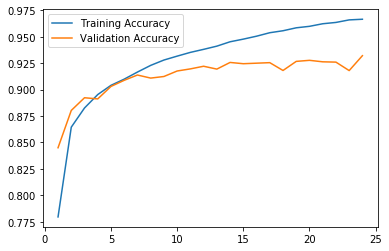

In [68]:
import numpy as np
import matplotlib.pyplot as plt
epoch_list = list(range(1, len(hist.history['accuracy']) + 1))
plt.plot(epoch_list, hist.history['accuracy'], epoch_list, hist.history['val_accuracy'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.show()